In [104]:
# Import các thư viện cần thiết
# pandas
import pandas as pd

# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# numpy
import numpy as np
import os

# matplotlib
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt

In [105]:
# để làm cho kết quả đầu ra của sổ ghi chép này ổn định qua các lần chạy
np.random.seed(42)

In [106]:
# Để vẽ những hình vẽ đẹp
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

In [107]:
# Lưu số liệu
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "training_linear_models"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

In [108]:
# Đọc dữ liệu từ file CSV
data = pd.read_csv('supermarket_sales.csv')

In [109]:
# hiển thị dữ liệu dưới dạng data frame
data

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Da Nang,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2023,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Ha Noi,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2023,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Da Nang,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2023,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Da Nang,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2023,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Da Nang,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2023,10:37,Ewallet,604.17,4.761905,30.2085,5.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1030,871-79-9983,B,Ho Chi Minh,Normal,Male,Fashion accessories,94.13,5,23.5325,600.0000,2/25/2023,19:39,Credit card,470.65,4.761905,23.5325,4.8
1031,750-67-8428,A,Da Nang,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2023,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1032,226-31-3081,C,Ha Noi,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2023,10:29,Cash,76.40,4.761905,3.8200,9.6
1033,631-41-3108,A,Da Nang,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2023,13:23,Credit card,324.31,4.761905,16.2155,7.4


In [110]:
print("Mô tả dữ liệu")
print("Invoice ID: Mã hóa đơn, định danh duy nhất cho mỗi giao dịch. Không phù hợp để làm feature hoặc label.")
print("Branch: Chi nhánh của siêu thị (A, B, hoặc C). Có thể sử dụng làm feature sau khi chuyển đổi thành dạng số hoặc mã hóa.")
print("City: Thành phố nơi chi nhánh siêu thị đặt trụ sở (Ha Noi, Da Nang, Ho Chi Minh). Có thể sử dụng làm feature sau khi mã hóa.")
print("Customer type: Loại khách hàng (Member, Normal). Có thể sử dụng làm feature sau khi mã hóa.")
print("Gender: Giới tính của khách hàng (Male, Female). Có thể sử dụng làm feature sau khi mã hóa.")
print("Product line: Dòng sản phẩm (Health and beauty, Electronic accessories, Home and lifestyle, Sports and travel, Food and beverages, Fashion accessories). Có thể sử dụng làm feature sau khi mã hóa.")
print("Unit price: Giá của mỗi đơn vị sản phẩm. Có thể sử dụng làm feature.")
print("Quantity: Số lượng sản phẩm mua. Có thể sử dụng làm feature.")
print("Tax 5%: Thuế giá trị gia tăng 5% cho sản phẩm. Có thể sử dụng làm feature.")
print("Total: Tổng giá trị đơn hàng bao gồm thuế. Đây là nhãn (label) cần dự đoán.")
print("Date: Ngày giao dịch. Có thể trích xuất thông tin như ngày trong tuần, tháng, quý để làm feature.")
print("Time: Thời gian giao dịch. Có thể chuyển đổi thành khoảng thời gian trong ngày để làm feature.")
print("Payment: Phương thức thanh toán (Cash, Credit card, Ewallet). Có thể sử dụng làm feature sau khi mã hóa.")
print("cogs: Giá vốn hàng bán. Có thể sử dụng làm feature.")
print("gross margin percentage: Tỷ lệ lãi gộp (%). Có thể sử dụng làm feature.")
print("gross income: Thu nhập gộp. Có thể sử dụng làm feature.")
print("Rating: Đánh giá của khách hàng. Có thể sử dụng làm feature")

Mô tả dữ liệu
Invoice ID: Mã hóa đơn, định danh duy nhất cho mỗi giao dịch. Không phù hợp để làm feature hoặc label.
Branch: Chi nhánh của siêu thị (A, B, hoặc C). Có thể sử dụng làm feature sau khi chuyển đổi thành dạng số hoặc mã hóa.
City: Thành phố nơi chi nhánh siêu thị đặt trụ sở (Ha Noi, Da Nang, Ho Chi Minh). Có thể sử dụng làm feature sau khi mã hóa.
Customer type: Loại khách hàng (Member, Normal). Có thể sử dụng làm feature sau khi mã hóa.
Gender: Giới tính của khách hàng (Male, Female). Có thể sử dụng làm feature sau khi mã hóa.
Product line: Dòng sản phẩm (Health and beauty, Electronic accessories, Home and lifestyle, Sports and travel, Food and beverages, Fashion accessories). Có thể sử dụng làm feature sau khi mã hóa.
Unit price: Giá của mỗi đơn vị sản phẩm. Có thể sử dụng làm feature.
Quantity: Số lượng sản phẩm mua. Có thể sử dụng làm feature.
Tax 5%: Thuế giá trị gia tăng 5% cho sản phẩm. Có thể sử dụng làm feature.
Total: Tổng giá trị đơn hàng bao gồm thuế. Đây là nhã

In [111]:
# thông tin về file dữ liệu
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1035 entries, 0 to 1034
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Invoice ID               1035 non-null   object 
 1   Branch                   1035 non-null   object 
 2   City                     1035 non-null   object 
 3   Customer type            1035 non-null   object 
 4   Gender                   1035 non-null   object 
 5   Product line             1035 non-null   object 
 6   Unit price               1035 non-null   float64
 7   Quantity                 1035 non-null   int64  
 8   Tax 5%                   1035 non-null   float64
 9   Total                    1035 non-null   float64
 10  Date                     1035 non-null   object 
 11  Time                     1035 non-null   object 
 12  Payment                  1035 non-null   object 
 13  cogs                     1035 non-null   float64
 14  gross margin percentage 

In [112]:
print("data analysis")

data analysis


In [113]:
data.isnull().sum()

Invoice ID                 0
Branch                     0
City                       0
Customer type              0
Gender                     0
Product line               0
Unit price                 0
Quantity                   0
Tax 5%                     0
Total                      0
Date                       0
Time                       0
Payment                    0
cogs                       0
gross margin percentage    0
gross income               0
Rating                     0
dtype: int64

In [114]:
data.describe()

,Unit price,Quantity,Tax 5%,Total,cogs,gross margin percentage,gross income,Rating
count,1035.000000,1035.000000,1035.000000,1035.000000,1035.000000,1035.000000,1035.000000,1035.000000
mean,55.758145,5.511111,15.419533,331.425617,308.390667,4.761905,15.419533,6.969855
std,26.431496,2.908439,11.656953,246.527424,233.139056,0.000000,11.656953,1.720555
min,10.080000,1.000000,0.508500,10.678500,10.170000,4.761905,0.508500,4.000000
25%,33.235000,3.000000,5.966000,127.921500,119.320000,4.761905,5.966000,5.500000
50%,55.390000,5.000000,12.210000,266.028000,244.200000,4.761905,12.210000,7.000000
75%,77.940000,8.000000,22.654250,501.642750,453.085000,4.761905,22.654250,8.500000
max,99.960000,10.000000,49.650000,1042.650000,993.000000,4.761905,49.650000,10.000000


In [115]:
data.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
1030    False
1031     True
1032     True
1033     True
1034    False
Length: 1035, dtype: bool

In [116]:
customer_ratings = data['Rating'].mean()
print(round(customer_ratings,2))

6.97


Gender
Female    518
Male      517
Name: count, dtype: int64
Saving figure Number_of_Customers


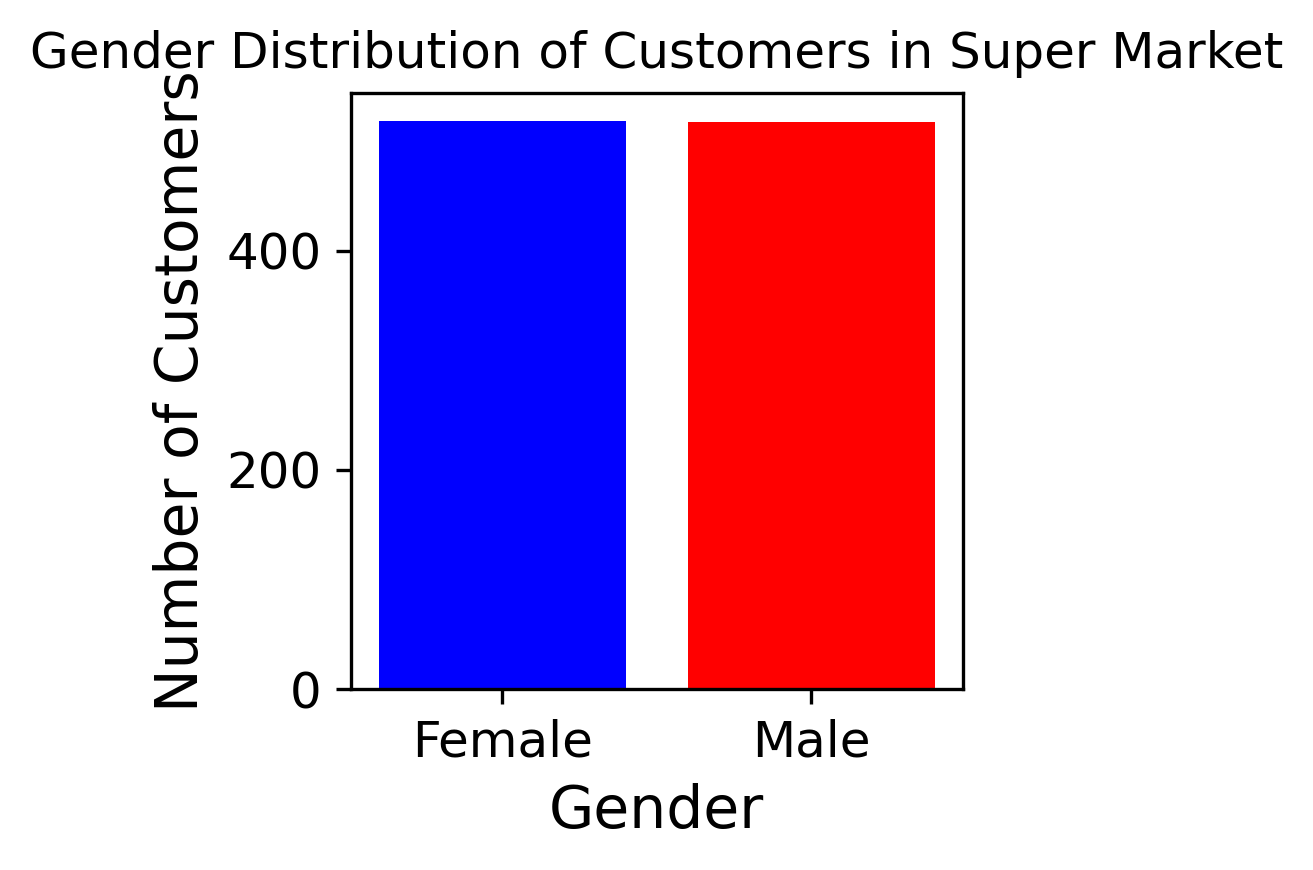

In [117]:
gender_count = data['Gender'].value_counts()
print(gender_count)
plt.figure(figsize=(3,3), dpi = 300)
plt.bar(gender_count.index, gender_count, color=['blue','red'])
plt.title("Gender Distribution of Customers in Super Market")
plt.xlabel('Gender')
plt.ylabel('Number of Customers')
save_fig("Number_of_Customers")
plt.show()

City
Da Nang        360
Ho Chi Minh    342
Ha Noi         333
Name: count, dtype: int64
Saving figure Distribution_of_Customers_by_City


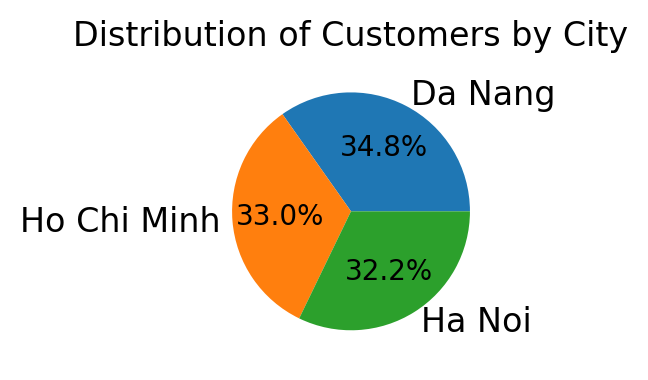

In [118]:
city_counts = data['City'].value_counts()
print(city_counts)

plt.figure(figsize=(4,2), dpi=200)
plt.pie(city_counts, labels=city_counts.index, autopct='%1.1f%%')
plt.title('Distribution of Customers by City')
save_fig("Distribution_of_Customers_by_City")
plt.show()

Customer type
Normal    520
Member    515
Name: count, dtype: int64
Saving figure Customer_Type_Distribution


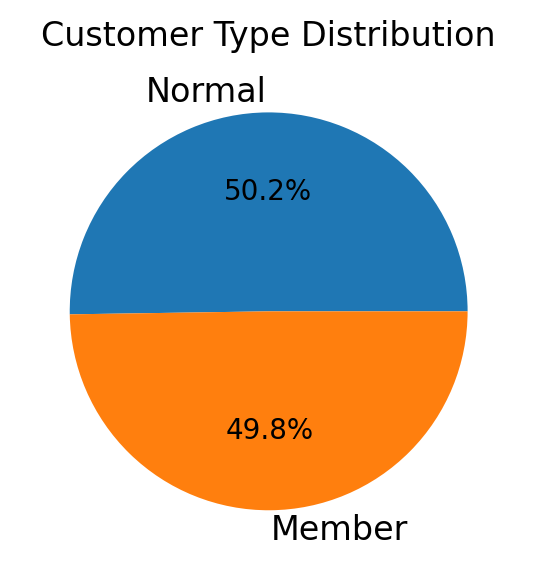

In [119]:
Customer = data['Customer type'].value_counts()
print(Customer)

plt.figure(figsize=(4,3), dpi=200)
plt.pie(Customer, labels=Customer.index, autopct='%1.1f%%')
plt.title('Customer Type Distribution')
save_fig("Customer_Type_Distribution")
plt.show()

In [120]:
productline_count = data['Product line'].value_counts()
print(productline_count)

Product line
Fashion accessories       182
Electronic accessories    178
Food and beverages        178
Sports and travel         170
Home and lifestyle        166
Health and beauty         161
Name: count, dtype: int64


Saving figure Product_Sales_Category_Distribution_in_Super_Market


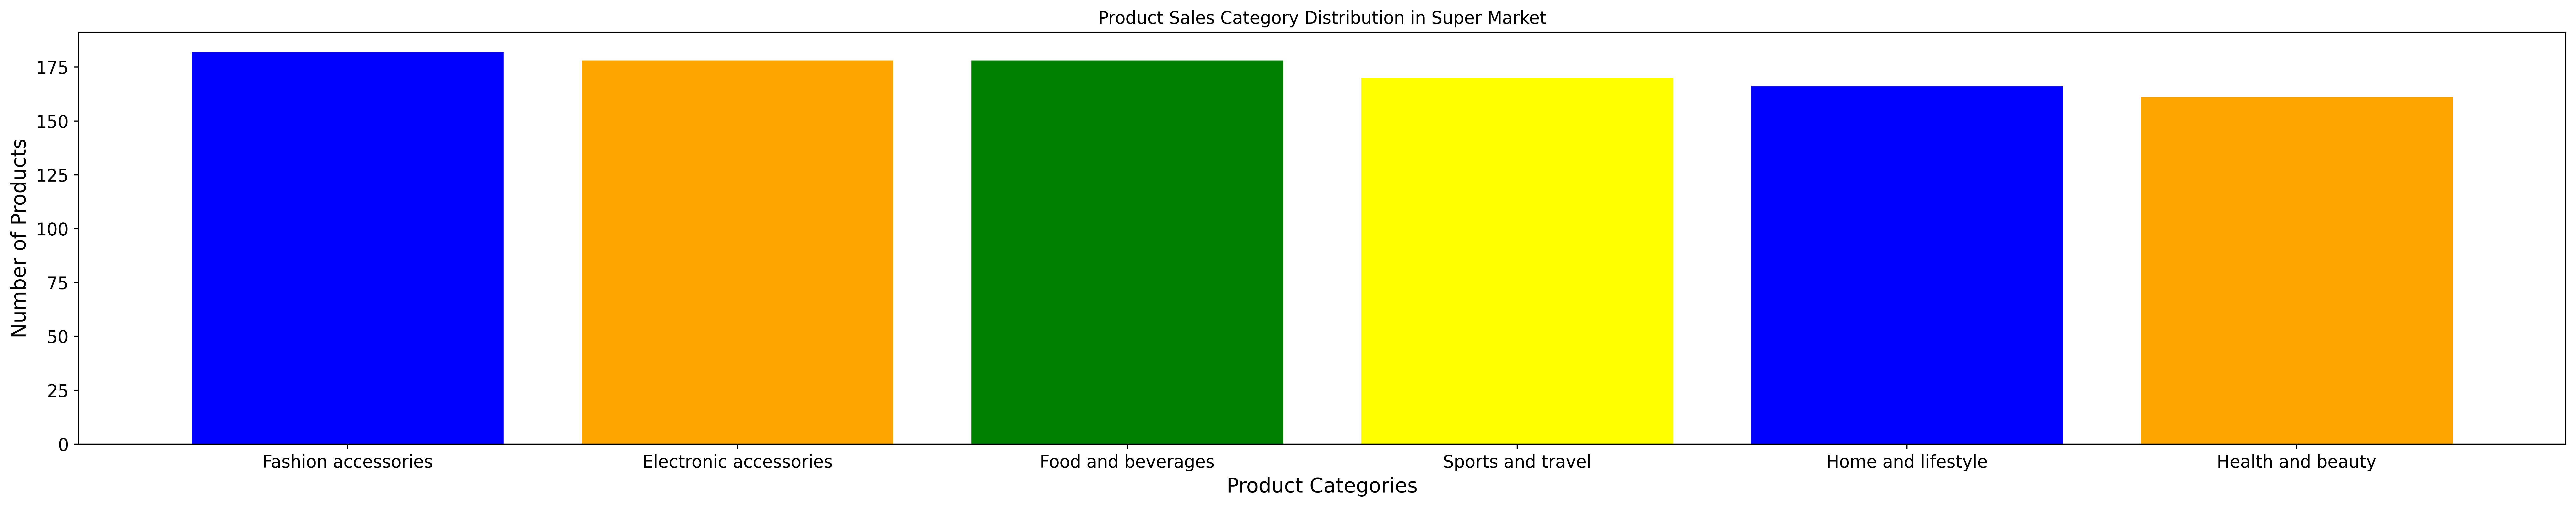

In [121]:
plt.figure(figsize=(25,5), dpi = 400)
plt.bar(productline_count.index, productline_count, color=['blue','orange','green','yellow'])
plt.title("Product Sales Category Distribution in Super Market")
plt.xlabel('Product Categories')
plt.ylabel('Number of Products')
save_fig("Product_Sales_Category_Distribution_in_Super_Market")

plt.show()

In [122]:
import plotly.express as px

In [123]:
ProductRating = data.groupby('Product line')['Rating'].mean().sort_values(ascending=False)

col = {
    'Product' : ProductRating.index,
    'Ratings' : ProductRating.values
}
ProductRating = pd.DataFrame(col)

fig = px.bar(ProductRating, x='Ratings', y='Product', title='Product Line Average Ratings', color="Ratings", orientation='h')
save_fig("Product_Line_Average_Ratings")
fig.show()

Saving figure Product_Line_Average_Ratings


<Figure size 640x480 with 0 Axes>

Saving figure sales_data_plot_Unit_price


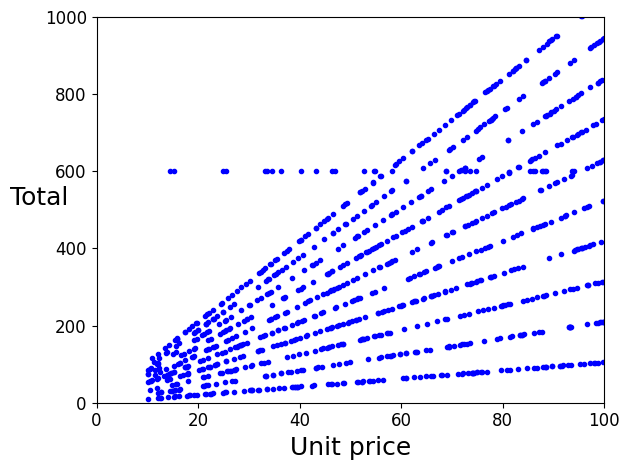

In [124]:
# Tiếp tục với việc trực quan hóa dữ liệu
plt.plot(data['Unit price'], data['Total'], "b.")
plt.xlabel("Unit price", fontsize=18)
plt.ylabel("Total", rotation=0, fontsize=18)
plt.axis([0, 100, 0, 1000])  # Điều chỉnh giới hạn trục để phù hợp với dữ liệu
save_fig("sales_data_plot_Unit_price")
plt.show()

Saving figure sales_data_plot_Quantity_per_total


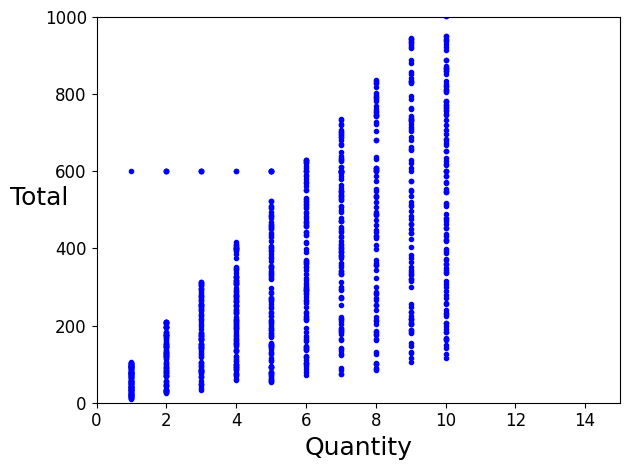

In [125]:
# Tiếp tục với việc trực quan hóa dữ liệu
plt.plot(data['Quantity'], data['Total'], "b.")
plt.xlabel("Quantity", fontsize=18)
plt.ylabel("Total", rotation=0, fontsize=18)
plt.axis([0, 15, 0, 1000])  # Điều chỉnh giới hạn trục để phù hợp với dữ liệu
save_fig("sales_data_plot_Quantity_per_total")
plt.show()


Saving figure tax_vs_total_plot


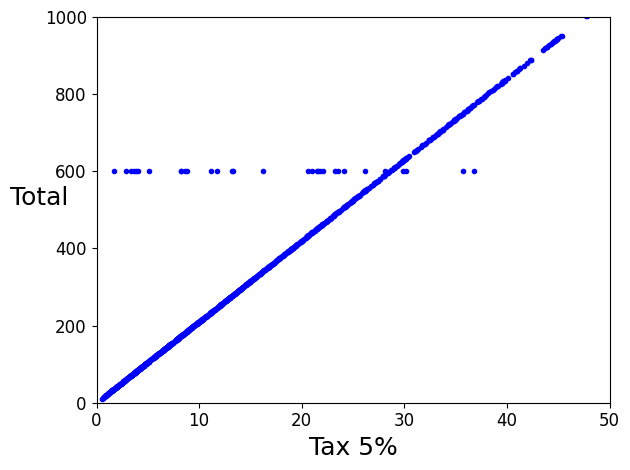

In [126]:
# Tiếp tục với việc trực quan hóa dữ liệu
plt.plot(data['Tax 5%'], data['Total'], "b.")
plt.xlabel("Tax 5%", fontsize=18)
plt.ylabel("Total", rotation=0, fontsize=18)
plt.axis([0, 50, 0, 1000])  # Điều chỉnh giới hạn trục để phù hợp với dữ liệu
save_fig("tax_vs_total_plot")
plt.show()

Saving figure cogs_vs_total_plot


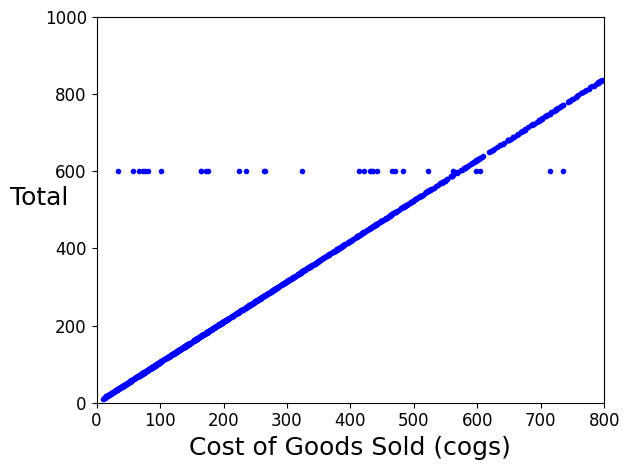

In [127]:
# Tiếp tục với việc trực quan hóa dữ liệu
plt.plot(data['cogs'], data['Total'], "b.")
plt.xlabel("Cost of Goods Sold (cogs)", fontsize=18)
plt.ylabel("Total", rotation=0, fontsize=18)
plt.axis([0, 800, 0, 1000])  # Điều chỉnh giới hạn trục để phù hợp với dữ liệu
save_fig("cogs_vs_total_plot")
plt.show()

Saving figure sales_vs_gross_margin_plot


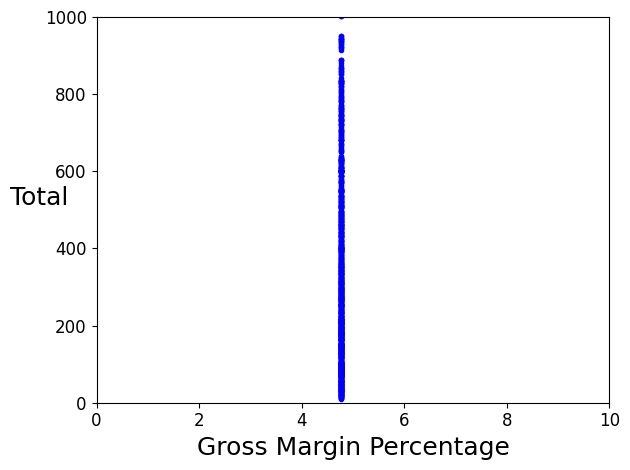

In [128]:
# Tiếp tục với việc trực quan hóa dữ liệu
plt.plot(data['gross margin percentage'], data['Total'], "b.")
plt.xlabel("Gross Margin Percentage", fontsize=18)
plt.ylabel("Total", rotation=0, fontsize=18)
plt.axis([0, 10, 0, 1000])  # Điều chỉnh giới hạn trục để phù hợp với dữ liệu
save_fig("sales_vs_gross_margin_plot")
plt.show()

Saving figure gross_income_vs_total_plot


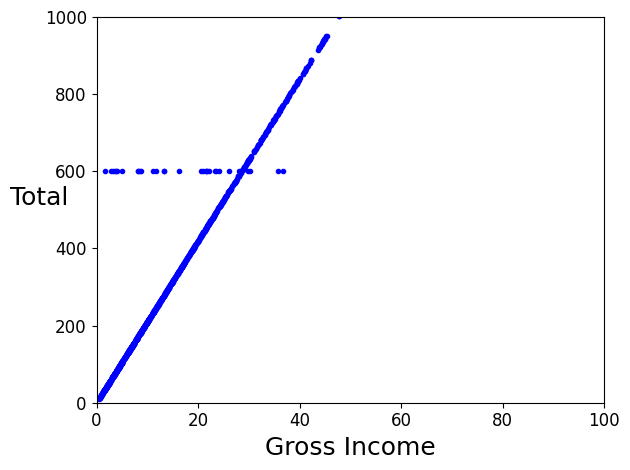

In [129]:
# Tiếp tục với việc trực quan hóa dữ liệu
plt.plot(data['gross income'], data['Total'], "b.")
plt.xlabel("Gross Income", fontsize=18)
plt.ylabel("Total", rotation=0, fontsize=18)
plt.axis([0, 100, 0, 1000])  # Điều chỉnh giới hạn trục để phù hợp với dữ liệu
save_fig("gross_income_vs_total_plot")
plt.show()

Saving figure rating_vs_total_plot


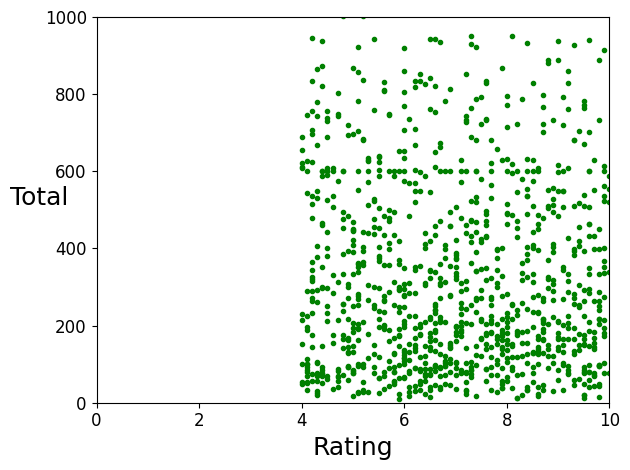

In [130]:
# Tiếp tục với việc trực quan hóa dữ liệu
plt.plot(data['Rating'], data['Total'], "g.")
plt.xlabel("Rating", fontsize=18)
plt.ylabel("Total", rotation=0, fontsize=18)
plt.axis([0, 10, 0, 1000])  # Điều chỉnh giới hạn trục để phù hợp với dữ liệu
save_fig("rating_vs_total_plot")
plt.show()

In [131]:
# đặt Invoice ID là chỉ mục
data.set_index('Invoice ID', inplace=True)

In [132]:
# Kiểm tra và xử lý dữ liệu thiếu (nếu có)
data.dropna(inplace=True)

In [133]:
# hiển thị dữ liệu ở 5 dòng đầu tiên
data.head(5)

,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
Invoice ID,,,,,,,,,,,,,,,,
750-67-8428,A,Da Nang,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2023,13:08,Ewallet,522.83,4.761905,26.1415,9.1
226-31-3081,C,Ha Noi,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2023,10:29,Cash,76.40,4.761905,3.8200,9.6
631-41-3108,A,Da Nang,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2023,13:23,Credit card,324.31,4.761905,16.2155,7.4
123-19-1176,A,Da Nang,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2023,20:33,Ewallet,465.76,4.761905,23.2880,8.4
373-73-7910,A,Da Nang,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2023,10:37,Ewallet,604.17,4.761905,30.2085,5.3


In [134]:
print("machine learning with Linear Regression")

machine learning with Linear Regression


In [135]:
# Chia dữ liệu thành features (đặc trưng) và target (mục tiêu)
X = data[['Unit price', 'Quantity', 'Tax 5%', 'cogs', 'gross margin percentage', 'gross income', 'Rating']]
y = data['Total']

In [136]:
# Chia dữ liệu thành tập huấn luyện và tập kiểm tra với tỷ lệ 80/20.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [137]:
# Xây dựng mô hình hồi quy tuyến tính
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [138]:
# In ra hệ số và chặn của mô hình
print("Intercept:", model.intercept_)
print("Coefficients:", model.coef_)

Intercept: 33.62616451330467
Coefficients: [-0.1763718  -2.51490825  0.05271052  1.05421045  0.          0.05271052
 -0.61408068]


In [139]:
# Tạo dữ liệu mới với 7 đặc trưng để dự đoán
X_new = np.array([[0, 0, 0, 0, 0, 0, 0], [2, 2, 2, 2, 2, 2, 2]])  # Thêm 7 cột đặc trưng với giá trị 0 và 2
y_predict = model.predict(X_new)

c:\Users\Quang Huy\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning:

X does not have valid feature names, but LinearRegression was fitted with feature names



In [140]:
# Đánh giá mô hình trên tập kiểm tra
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

Mean Squared Error: 1586.4722642013053


Saving figure linear_model_predictions_plot


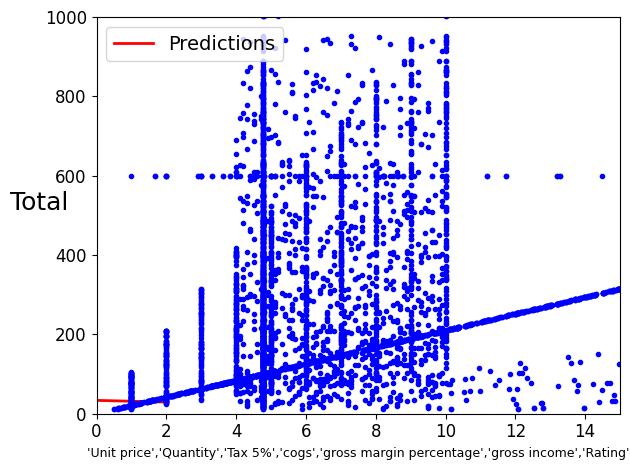

In [141]:
# Trực quan hoá dự đoán
plt.plot(X_new[:, 0], y_predict, "r-", linewidth=2, label="Predictions")  # Chỉ lấy cột đầu tiên của X_new
plt.plot(X, y, "b.")
plt.xlabel("'Unit price','Quantity','Tax 5%','cogs','gross margin percentage','gross income','Rating'", fontsize=9)
plt.ylabel("Total", rotation=0, fontsize=18)
plt.legend(loc="upper left", fontsize=14)
plt.axis([0, 15, 0, 1000])  # Điều chỉnh giới hạn trục để phù hợp với dữ liệu
save_fig("linear_model_predictions_plot")
plt.show()

In [142]:
# Dùng hàm np.linalg.lstsq để tính toán theta_best
X_b = np.c_[np.ones((len(X), 1)), X]  # Thêm x0 = 1 vào mỗi instance
theta_best_svd, residuals, rank, s = np.linalg.lstsq(X_b, y, rcond=1e-6)
print("Theta_best_svd:", theta_best_svd)

Theta_best_svd: [ 1.20134701 -0.15666598 -2.02528971  0.0526393   1.0527859   5.72070006
  0.0526393  -0.48965864]


In [143]:
# Dùng pseudoinverse để tính toán theta_best
theta_best_pinv = np.linalg.pinv(X_b).dot(y)
print("Theta_best_pinv:", theta_best_pinv)

Theta_best_pinv: [ 1.20134701 -0.15666598 -2.02528971  0.0526393   1.0527859   5.72070006
  0.0526393  -0.48965864]


In [144]:
# Lưu mô hình đã huấn luyện
import joblib
joblib.dump(model, 'sales_prediction_model.pkl')

['sales_prediction_model.pkl']

In [145]:
print("Machine learning with Decision Tree Regressor")

Machine learning with Decision Tree Regressor


In [146]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error
import joblib
import matplotlib.pyplot as plt

# Đọc dữ liệu từ file CSV
data = pd.read_csv('supermarket_sales.csv')

# Chọn features và target
X = data[['Unit price', 'Quantity', 'Tax 5%', 'cogs', 'gross margin percentage', 'gross income', 'Rating']]
y = data['Total']

# Chia dữ liệu thành tập huấn luyện và tập kiểm tra với tỷ lệ 80/20.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



In [147]:
# Xây dựng mô hình Decision Tree
model = DecisionTreeRegressor(random_state=42)
model.fit(X_train, y_train)

DecisionTreeRegressor(random_state=42)

In [148]:
# Đánh giá mô hình trên tập kiểm tra
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

Mean Squared Error: 5145.988623194143


In [149]:
# Lưu số liệu
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "decision_tree_model"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_figs(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

Saving figure decision_tree_model_predictions_plot


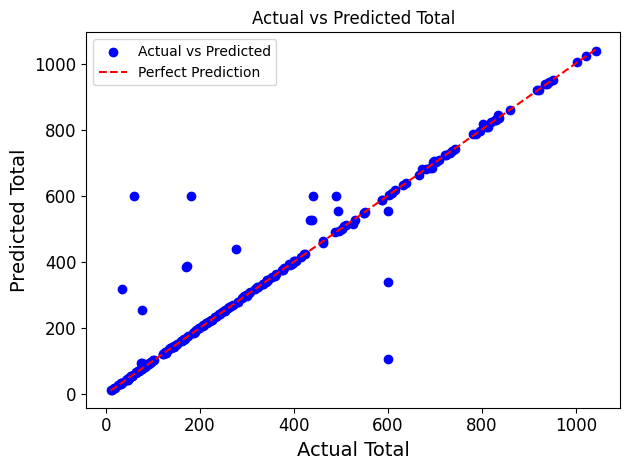

In [150]:
# Trực quan hoá dự đoán và kết quả thực tế trên tập kiểm tra
plt.scatter(y_test, y_pred, color='blue', label='Actual vs Predicted')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--', label='Perfect Prediction')
plt.xlabel('Actual Total')
plt.ylabel('Predicted Total')
plt.title('Actual vs Predicted Total')
plt.legend()
save_figs("decision_tree_model_predictions_plot")
plt.show()

In [151]:
# Lưu mô hình đã huấn luyện
joblib.dump(model, 'decision_tree_model.pkl')

['decision_tree_model.pkl']

In [152]:
print("Machine learning with Support Vector Machines")

Machine learning with Support Vector Machines


In [170]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error
import joblib
import matplotlib.pyplot as plt
import seaborn as sns


# Đọc dữ liệu từ file CSV
data = pd.read_csv('supermarket_sales.csv')

In [154]:
# Hiển thị dữ liệu trước dự đoán
data.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Da Nang,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2023,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Ha Noi,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2023,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Da Nang,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2023,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Da Nang,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2023,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Da Nang,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2023,10:37,Ewallet,604.17,4.761905,30.2085,5.3


In [155]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1035 entries, 0 to 1034
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Invoice ID               1035 non-null   object 
 1   Branch                   1035 non-null   object 
 2   City                     1035 non-null   object 
 3   Customer type            1035 non-null   object 
 4   Gender                   1035 non-null   object 
 5   Product line             1035 non-null   object 
 6   Unit price               1035 non-null   float64
 7   Quantity                 1035 non-null   int64  
 8   Tax 5%                   1035 non-null   float64
 9   Total                    1035 non-null   float64
 10  Date                     1035 non-null   object 
 11  Time                     1035 non-null   object 
 12  Payment                  1035 non-null   object 
 13  cogs                     1035 non-null   float64
 14  gross margin percentage 

In [173]:
# Lưu số liệu
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "Support_Vector_Machines_model"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_figsvn(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

Saving figure Total_Sales_Distribution_by_City


<Figure size 1200x600 with 0 Axes>

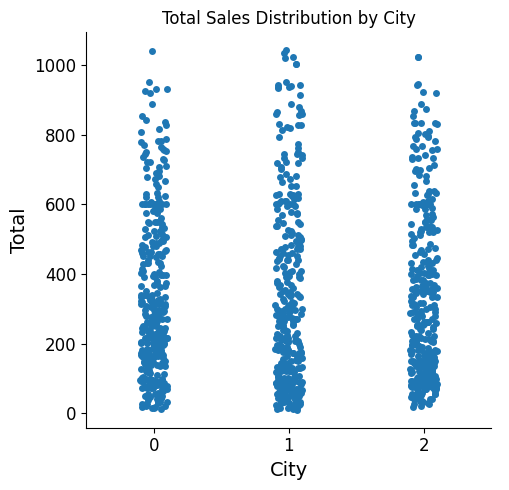

In [186]:
# Trực quan hóa dữ liệu trước dự đoán
plt.figure(figsize=(12, 6))
sns.catplot(x='City', y='Total', data=data)
plt.title('Total Sales Distribution by City')
save_figsvn("Total_Sales_Distribution_by_City")
plt.show()

In [175]:
# Mã hóa các cột phân loại
label_encoders = {}
categorical_columns = ['Branch', 'City', 'Customer type', 'Gender', 'Product line', 'Payment']

for col in categorical_columns:
    le = LabelEncoder()
    data[col] = le.fit_transform(data[col])
    label_encoders[col] = le

In [176]:
# Chọn features và label
features = ['Unit price', 'Quantity', 'Tax 5%', 'cogs', 'gross margin percentage', 'gross income', 'Rating'] + categorical_columns
X = data[features]
y = data['Total']

In [177]:
# Chia dữ liệu thành tập huấn luyện và tập kiểm tra với tỷ lệ 80/20.

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Chuẩn hóa dữ liệu
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [178]:
# Xây dựng mô hình SVM
model = SVR(kernel='rbf')
model.fit(X_train_scaled, y_train)

SVR()

In [179]:
# Đánh giá mô hình trên tập kiểm tra
y_pred = model.predict(X_test_scaled)
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

Mean Squared Error: 52217.114074974656


Saving figure SVM_model_predictions_plot


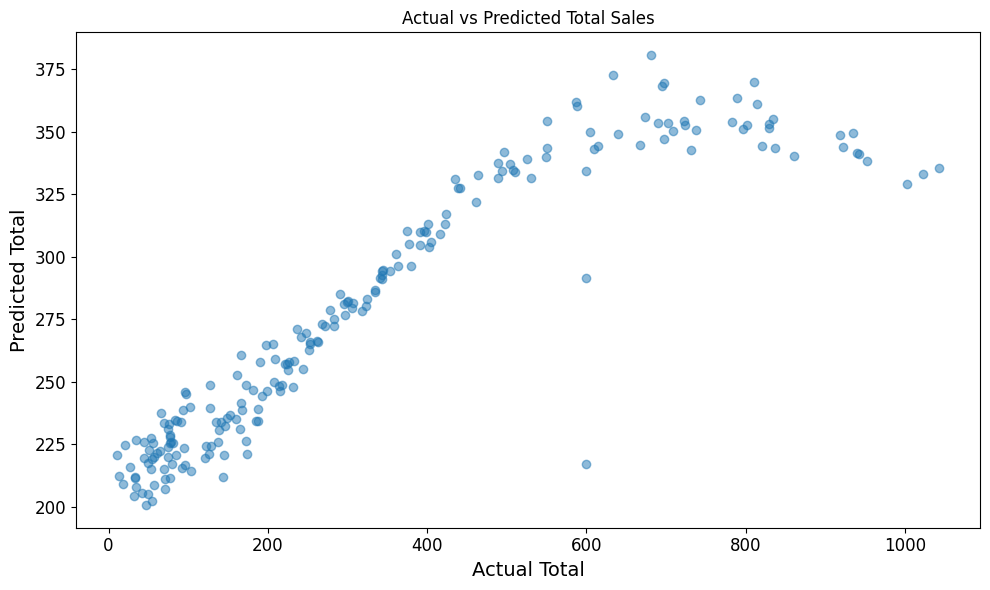

In [187]:
# Trực quan hoá dự đoán
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.xlabel('Actual Total')
plt.ylabel('Predicted Total')
plt.title('Actual vs Predicted Total Sales')
save_figsvn("SVM_model_predictions_plot")
plt.show()

Saving figure Actual_vs_Predicted_Total_Sales_for_{city_name}


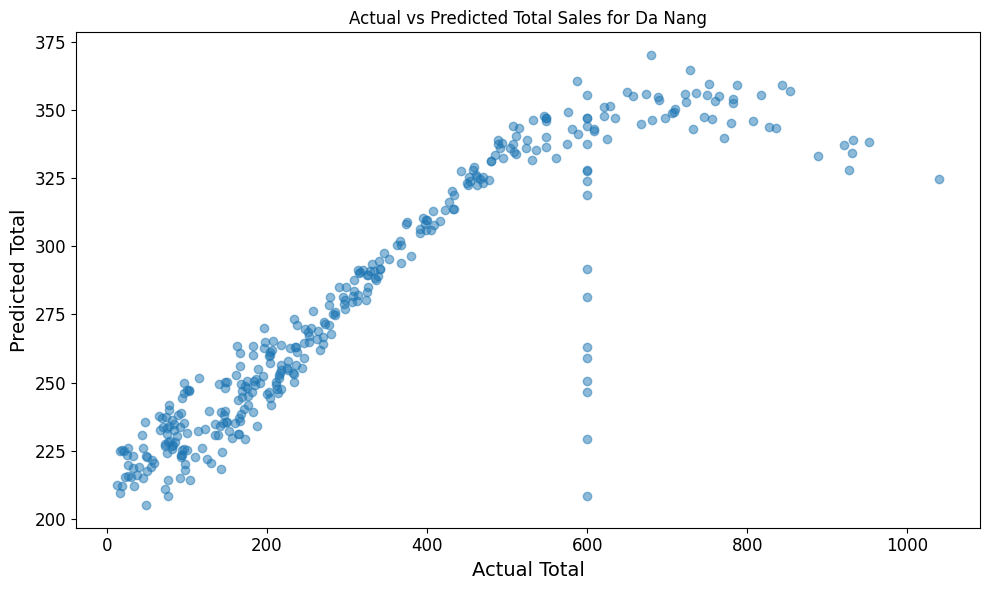

Mean Squared Error for Da Nang: 39239.85423581536
Saving figure Actual_vs_Predicted_Total_Sales_for_{city_name}


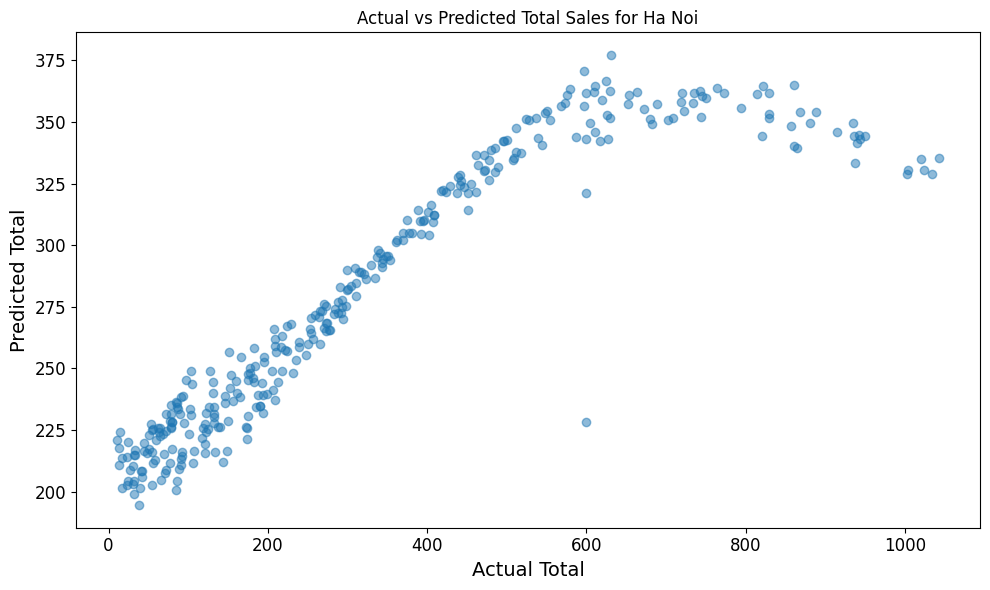

Mean Squared Error for Ha Noi: 49840.850115651694
Saving figure Actual_vs_Predicted_Total_Sales_for_{city_name}


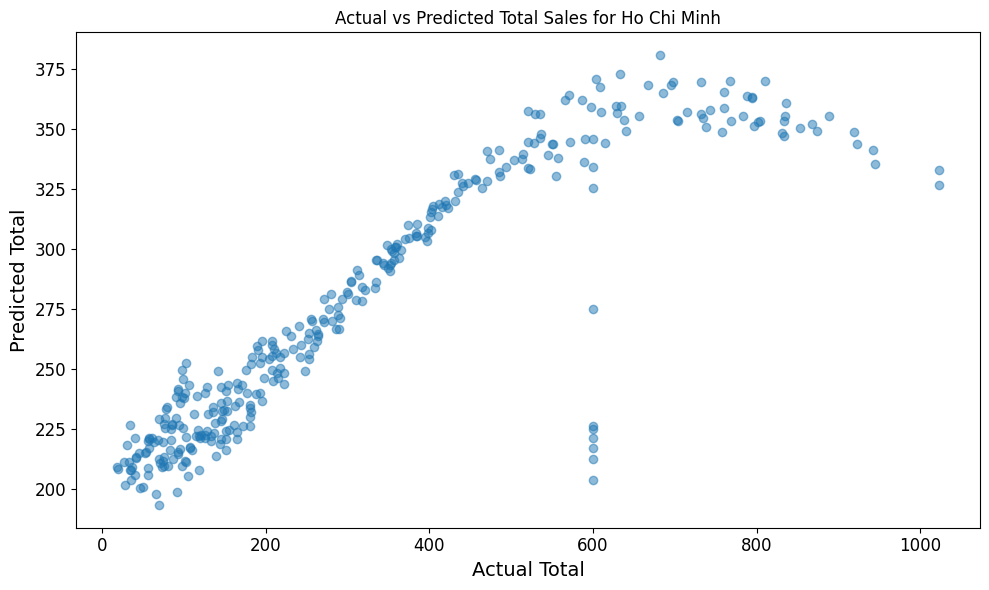

Mean Squared Error for Ho Chi Minh: 41444.227279215025


In [191]:
# Dự đoán theo từng thành phố
cities = label_encoders['City'].classes_
for city_code in range(len(cities)):
    city_name = cities[city_code]
    city_data = data[data['City'] == city_code]
    X_city = city_data[features]
    y_city = city_data['Total']
    
    X_city_scaled = scaler.transform(X_city)
    y_city_pred = model.predict(X_city_scaled)
    
    plt.figure(figsize=(10, 6))
    plt.scatter(y_city, y_city_pred, alpha=0.5)
    plt.xlabel('Actual Total')
    plt.ylabel('Predicted Total')
    plt.title(f'Actual vs Predicted Total Sales for {city_name}')
    save_figsvn('Actual_vs_Predicted_Total_Sales_for_{city_name}')
    plt.show()

    city_mse = mean_squared_error(y_city, y_city_pred)
    print(f'Mean Squared Error for {city_name}:', city_mse)


In [182]:
# Lưu mô hình đã huấn luyện
joblib.dump(model, 'svm_model.pkl')
joblib.dump(scaler, 'scaler.pkl')

['scaler.pkl']

Saving figure Total_Sales_Distribution_by_Product_Line


<Figure size 1200x600 with 0 Axes>

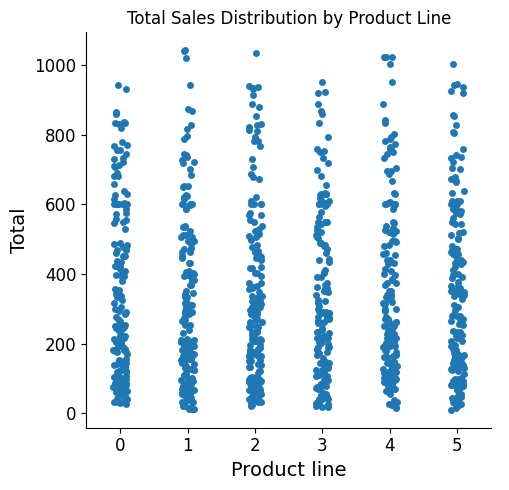

In [190]:
# Trực quan hóa dữ liệu trước dự đoán
plt.figure(figsize=(12, 6))
sns.catplot(x='Product line', y='Total', data=data)
plt.title('Total Sales Distribution by Product Line')
save_figsvn('Total_Sales_Distribution_by_Product_Line')
plt.show()

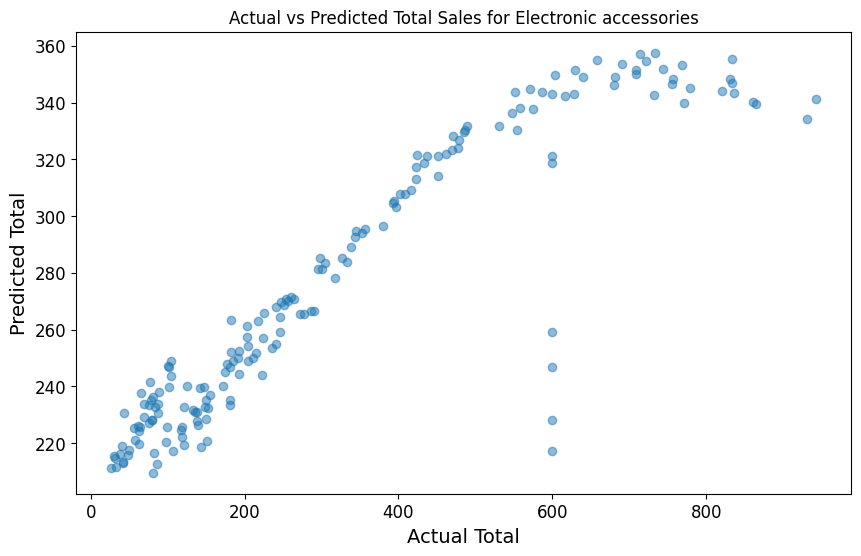

Mean Squared Error for Electronic accessories: 44258.06818595301


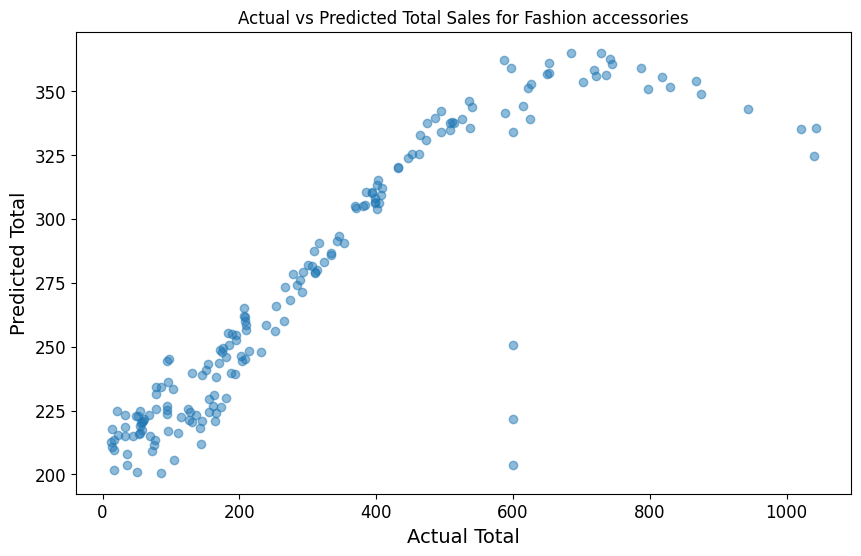

Mean Squared Error for Fashion accessories: 41270.26018069525


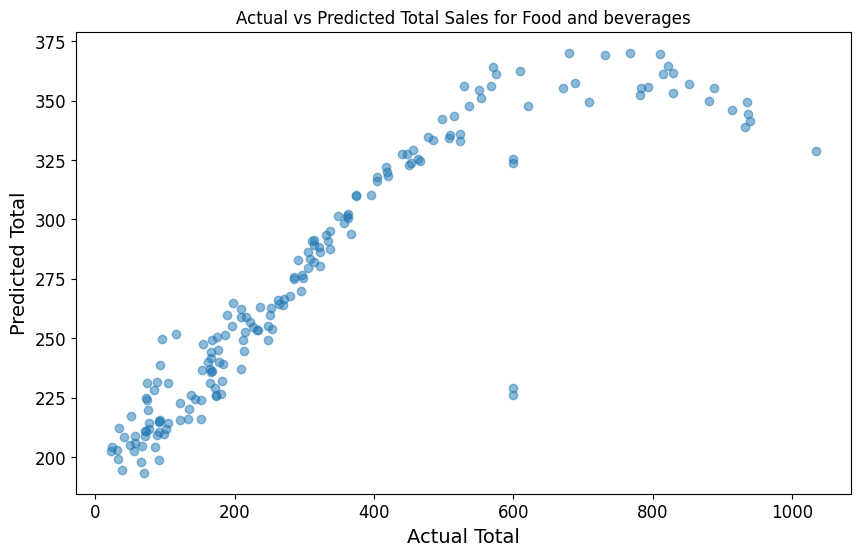

Mean Squared Error for Food and beverages: 43055.60863104986


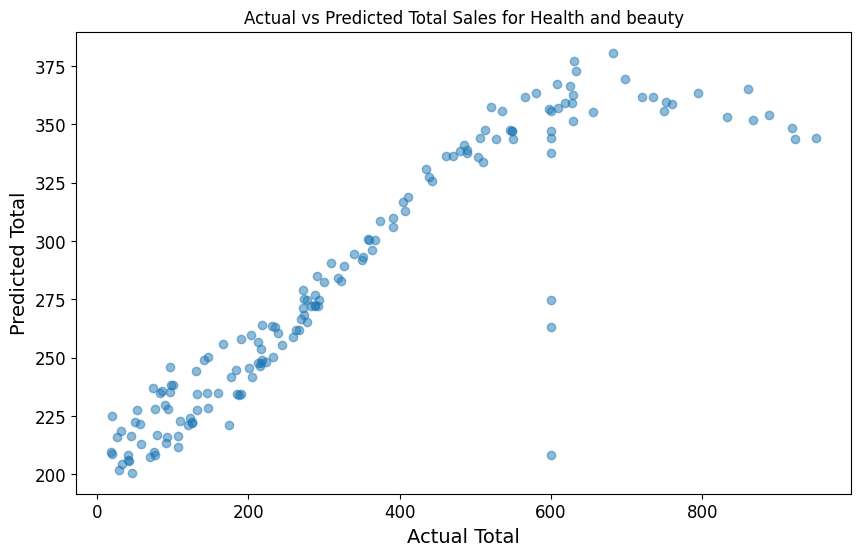

Mean Squared Error for Health and beauty: 38872.60415151339


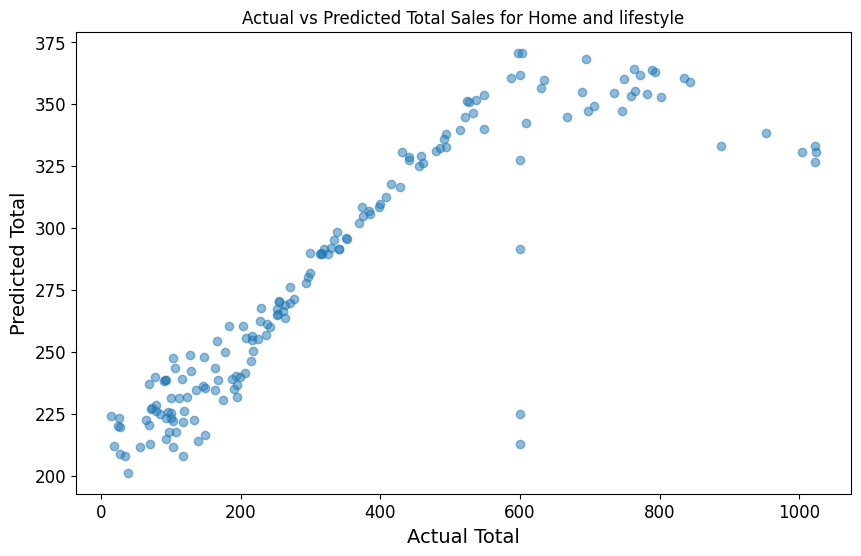

Mean Squared Error for Home and lifestyle: 47983.74563202856


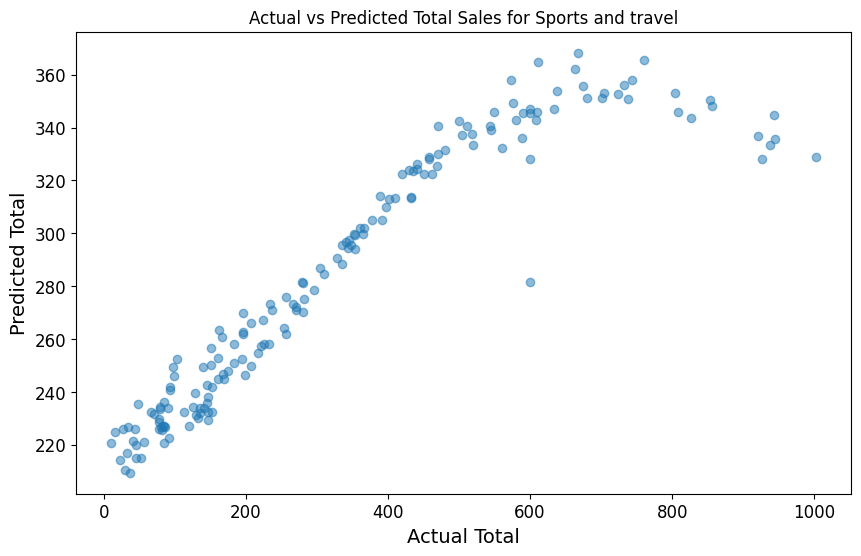

Mean Squared Error for Sports and travel: 44826.25572513905


In [192]:
# Dự đoán theo từng dòng sản phẩm
product_lines = label_encoders['Product line'].classes_
for product_code in range(len(product_lines)):
    product_name = product_lines[product_code]
    product_data = data[data['Product line'] == product_code]
    X_product = product_data[features]
    y_product = product_data['Total']
    
    X_product_scaled = scaler.transform(X_product)
    y_product_pred = model.predict(X_product_scaled)
    
    plt.figure(figsize=(10, 6))
    plt.scatter(y_product, y_product_pred, alpha=0.5)
    plt.xlabel('Actual Total')
    plt.ylabel('Predicted Total')
    plt.title(f'Actual vs Predicted Total Sales for {product_name}')
    plt.show()

    product_mse = mean_squared_error(y_product, y_product_pred)
    print(f'Mean Squared Error for {product_name}:', product_mse)